# 15.1//Best Practices
## 15.1.1//Docstrings
<b><u>Docstring formats:</b><u>
<li>Google Style</li>
<li>Numpydoc</li>
<li>reStructuredText</li>
<li>EpyText</li>
   
 
### Retrieving docstrings(1)

In [6]:
def the_answer():
    """Return the answer to life,
    the universe, and everything.
    Returns:
    int2
    """
    return 42
print(the_answer.__doc__)

Return the answer to life,
    the universe, and everything.
    Returns:
    int2
    


### Retrieving docstrings(2)

In [8]:
import inspect
print(inspect.getdoc(the_answer))

Return the answer to life,
the universe, and everything.
Returns:
int2


If you've spent any time browsing numpy's online documentation, you will notice that it is built directly from the docstrings. There are some wonderful tools like sphinx and pydoc that will automatically generate online documentation for you based off of your docstrings.

## 15.1.2// DRY and "Do One Thing"
DRY-dont repeat yourself<br>
Do one thing- One job/work for one function

## 15.1.3// Pass by assignment
The way that Python passes information to functions is different from many other languages. It is referred to as "pass by assignment"<br>

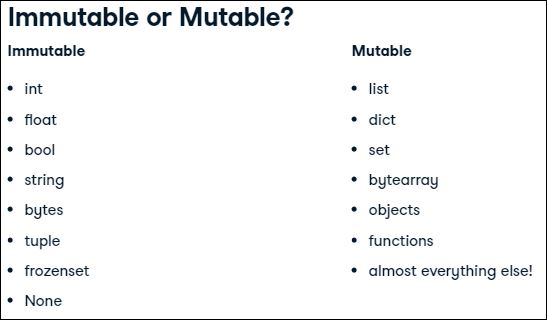
There are only a few immutable data types in Python because almost everything is represented as an object. The only way to tell if something is mutable is to see if there is a function or method that will change the object without assigning it to a new variable.

#### ex_
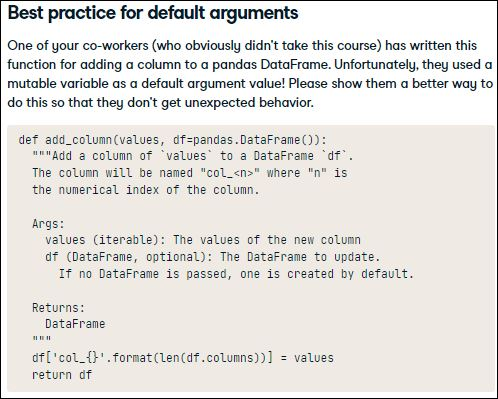

In [9]:
# Use an immutable variable for the default argument
def better_add_column(values, df=None):
      """Add a column of `values` to a DataFrame `df`.
  The column will be named "col_<n>" where "n" is
  the numerical index of the column.

  Args:
    values (iterable): The values of the new column
    df (DataFrame, optional): The DataFrame to update.
      If no DataFrame is passed, one is created by default.

  Returns:
    DataFrame
  """
  # Update the function to create a default DataFrame
      if df is None:
        df = pandas.DataFrame()
        df['col_{}'.format(len(df.columns))] = values
        return df

# 15.2//Context Managers
## 15.2.1// Using context managers
A context manager is a type of function that sets up a context for your code to run in, runs your code, and then removes the context. That's not a very helpful definition though, so let me explain with an analogy.
<code>
    with open('my_file.txt') as my_file:
        text = my_file.read()
        length = len(text)
    print('The file is {} characters long'.format(length))
</code>

In [ ]:
G:\datacamp\15. writing functions in python\New folder

In [10]:
# Open "alice.txt" and assign the file to "file"
with open('G:\\datacamp\\15. writing functions in python\\New folder\\alicee.txt','r',encoding='utf8') as file:
     text = file.read()
#print(text)
#print(file)
n = 0
#print(text)
for word in text.split():  ##use .split()
#   print(word)
    if word.lower() in ['cat', 'cats']:
        n += 1
#print(n)
print('Lewis Carroll uses the word "cat" {} times'.format(n))
#print(text)

Lewis Carroll uses the word "cat" 48 times


## 15.2.2// Writing context managers
mainly two ways:<br>
<li>class bases: object oriented program</li>
<li>function based</li>
five steps to write a context manager.

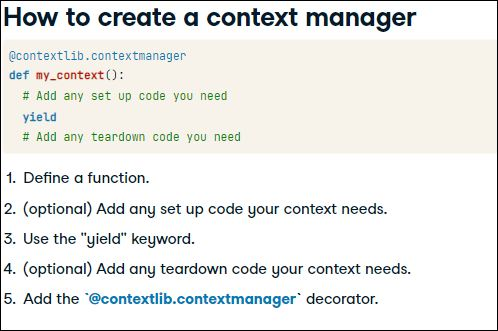

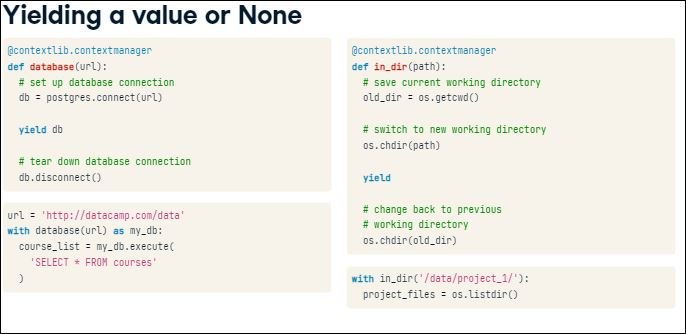

In [62]:
pip install contextlib2

Note: you may need to restart the kernel to use updated packages.


In [6]:
#####exer
from contextlib import contextmanager
# Add a decorator that will make timer() a context manager
@contextmanager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))

with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)

NameError: name 'time' is not defined

In [5]:
pip install time

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [11]:
import contextlib
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

#with open_read_only('my_file.txt') as my_file:
 # print(my_file.read())

In [ ]:
Congratulations! You wrote a context manager that acts like "open()" but operates in read-only mode!

## 15.2.3//Advanced topics
### Nested context

In [ ]:
def copy(src, dst):
    """Copy the contents of one file to another.
    Args:
    src (str): File name of the file to be copied.
    dst (str): Where to write the new file.
    """
    # Open the source file and read in the contents
    with open(src) as f_src:
        contents = f_src.read()
    # Open the destination file and write out the contents
    with open(dst, 'w') as f_dst:
        f_dst.write(contents)

This works fine until the meory is too big to handle. Then we may consider to use line by line ncopy paste. That's where nested context is coming.

In [ ]:
def copy(src, dst):
    """Copy the contents of one file to another.
    Args:
    src (str): File name of the file to be copied.
    dst (str): Where to write the new file.
    """
    # Open both files
    with open(src) as f_src:
        with open(dst, 'w') as f_dst:
            # Read and write each line, one at a time
            for line in f_src:
                f_dst.write(line)

This would let us copy the file without worrying about how big it is. In Python, nested "with" statements are perfectly legal. This code opens the source file and then opens the destination file inside the source file's context. That means code that runs inside the context created by opening the destination file has access to both the "f_src" and the "f_dst" file objects. So we are able to copy the file over one line at a time like we wanted to!
### Handling errors:(try,except,finally,)
One thing you will want to think about when writing your context managers is: What happens if the programmer who uses your context manager writes code that causes an error? Imagine you've written this function that lets someone connect to the printer. The printer only allows one connection at a time, so it is imperative that "p.disconnect()" gets called, or else no one else will be able to print! Someone decides to use your get_printer() function to print the text of their document. However, they weren't paying attention and accidentally typed "txt" instead of "text". This will raise a KeyError because "txt" is not in the "doc" dictionary. And that means "p.disconnect()" doesn't get called.

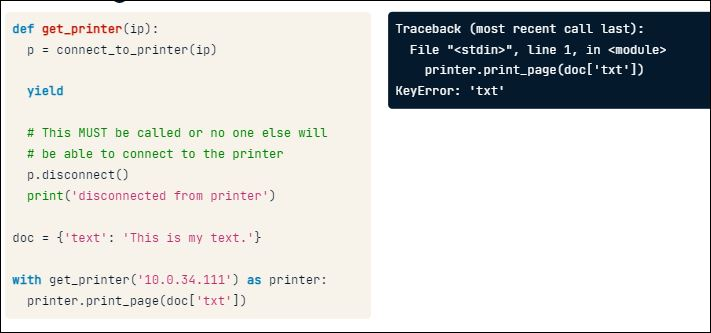

<code>
    try:
    # code that might raise an error
    except:
    # do something about the error
    finally:
    # this code runs no matter what
</code>
WE SHOULD USE FINALLY TO DISCONNECT OR DO ANY PATTERNS LATER

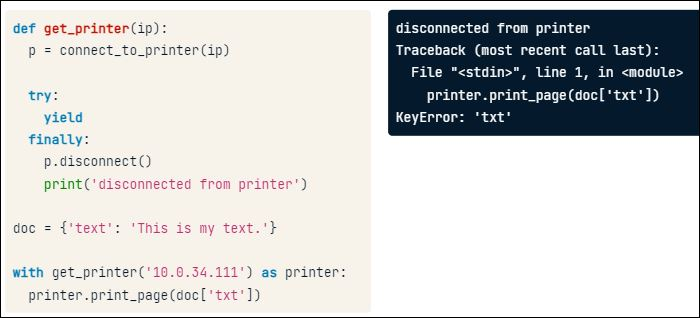

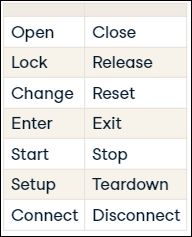

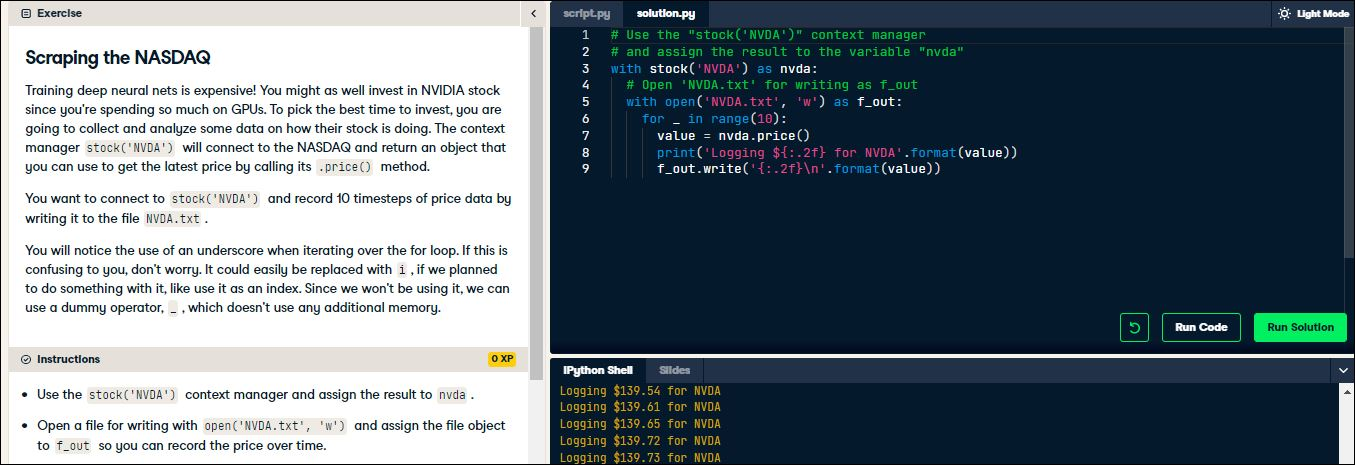

#### e/ Changing the working directory
You are using an open-source library that lets you train deep neural networks on your data. Unfortunately, during training, this library writes out checkpoint models (i.e., models that have been trained on a portion of the data) to the current working directory. You find that behavior frustrating because you don't want to have to launch the script from the directory where the models will be saved.

You decide that one way to fix this is to write a context manager that changes the current working directory, lets you build your models, and then resets the working directory to its original location. You'll want to be sure that any errors that occur during model training don't prevent you from resetting the working directory to its original location

In [ ]:
def in_dir(directory):
     """Change current working directory to `directory`,
     allow the user to run some code, and change back.

    Args:
       directory (str): The path to a directory to work in.
    """
    current_dir = os.getcwd()
    os.chdir(directory)

      # Add code that lets you handle errors
    try:
        yield
      # Ensure the directory is reset,
      # whether there was an error or not
    finally:
        os.chdir(current_dir)

# 15.3//Decorators
## 15.3.1// Functions are objects
The main thing you should take away from this lesson is that functions are just like any other object in Python. They are not fundamentally different from lists, dictionaries, DataFrames, strings, integers, floats, modules, or anything else in Python.

In [10]:
def my_function():
    return 42
x = my_function
print(my_function())      ## calling function
my_function               ## refering function

42


<function __main__.my_function()>

### function as arguments

In [11]:
def has_docstring(func):
    """Check to see if the function
    `func` has a docstring.
    Args:
        func (callable): A function.
    Returns:
        bool
    """
    return func.__doc__ is not None

In [12]:
def no():
    return 42
def yes():
    """Return the value 42
    """
    return 42

In [14]:
has_docstring(no),has_docstring(yes)

(False, True)

### e// Returning functions for a math game
You are building an educational math game where the player enters a math term, and your program returns a function that matches that term. For instance, if the user types "add", your program returns a function that adds two numbers. So far you've only implemented the "add" function. Now you want to include a "subtract" function.

In [2]:
def create_math_function(func_name):
  if func_name == 'add':
    def add(a, b):
        return a + b*a
    return add
  elif func_name == 'subtract':
    # Define the subtract() function
    def subtract(a,b):
        return a-b
    
    return subtract
  else:
    print("I don't know that one")
    
add = create_math_function('add')
print('5 + 2 = {}'.format(add(5, 2)))

subtract = create_math_function('subtract')
print('5 - 2 = {}'.format(subtract(5, 2)))

add(6,9)

5 + 2 = 15
5 - 2 = 3


60

In [15]:
add(6,5)

36

In [28]:
def my_ass(x,y):
    return x+y
my_ass(5,3)

8

In [5]:
[10,9,8,7,6,5,4,3,2,1]
reversed(list(range(1,11)))

In [2]:
range(1,6)

range(1, 6)

In [16]:
import math
print(math.pow(2,3))

8.0


In [4]:
x=[1,2,3,4,5]
x.remove(2)
print(x)

[1, 3, 4, 5]


## 15.3.2// scope

In [17]:
x = 50

def one():
  x = 10

def two():
  global x
  x = 30

def three():
  x = 100
  print(x)

for func in [one, two, three]:
  func()
  print(x)

50
30
100
30


### e// Modifying variables outside local scope
Sometimes your functions will need to modify a variable that is outside of the local scope of that function. While it's generally not best practice to do so, it's still good to know how in case you need to do it. Update these functions so they can modify variables that would usually be outside of their scope.

In [18]:
### Add a keyword that lets us update call_count from inside the function.

call_count = 0

def my_function():
  # Use a keyword that lets us update call_count 
  global call_count
  call_count += 1
  
  print("You've called my_function() {} times!".format(
    call_count
  ))
  
for _ in range(20):
  my_function()

You've called my_function() 1 times!
You've called my_function() 2 times!
You've called my_function() 3 times!
You've called my_function() 4 times!
You've called my_function() 5 times!
You've called my_function() 6 times!
You've called my_function() 7 times!
You've called my_function() 8 times!
You've called my_function() 9 times!
You've called my_function() 10 times!
You've called my_function() 11 times!
You've called my_function() 12 times!
You've called my_function() 13 times!
You've called my_function() 14 times!
You've called my_function() 15 times!
You've called my_function() 16 times!
You've called my_function() 17 times!
You've called my_function() 18 times!
You've called my_function() 19 times!
You've called my_function() 20 times!


In [19]:
### Add a keyword that lets us modify file_contents from inside save_contents().
def read_files():
  file_contents = None
  
  def save_contents(filename):
    # Add a keyword that lets us modify file_contents
    nonlocal file_contents
    if file_contents is None:
      file_contents = []
    with open(filename) as fin:
      file_contents.append(fin.read())
      
  for filename in ['1984.txt', 'MobyDick.txt', 'CatsEye.txt']:
    save_contents(filename)
    
  return file_contents

print('\n'.join(read_files()))

FileNotFoundError: [Errno 2] No such file or directory: '1984.txt'

In [21]:
import random

In [22]:
def wait_until_done():
  def check_is_done():
    # Add a keyword so that wait_until_done() 
    # doesn't run forever
    global done
    if random.random() < 0.1:
      done = True
      
  while not done:
    check_is_done()

done = False
wait_until_done()

print('Work done? {}'.format(done))

Work done? True


 By adding global done in check_is_done(), you ensure that the done being referenced is the one that was set to False before wait_until_done() was called. Without this keyword, wait_until_done() would loop forever because the done = True in check_is_done() would only be changing a variable that is local to check_is_done(). Understanding what scope your variables are in will help you debug tricky situations like this one.

## 15.3.3// Closures
A closure in Python is a tuple of variables that are no longer in scope, but that a function needs in order to run. Those variables get stored in a tuple in the "__closure__" attribute of the function. The closure for "func" has one variable, and you can view the value of that variable by accessing the "cell_contents" of the item.<br>
A nonlocal variable is any variable that gets defined in the parent function's scope, and that gets used by the child function.And finally, a closure is Python's way of attaching nonlocal variables to a returned function so that the function can operate even when it is called outside of its parent's scope.<br>
we need it to work with decorators.  In order to work, decorators have to make use of all of these concepts: functions as objects, nested functions, nonlocal scope, and closures. Now that you have a firm foundation to build on, understanding how decorators work should be easy.

#### e// 1.Use an attribute of the my_func() function to show that it has a closure that is not None.<br> 2.Show that there are two variables in the closure. <br> 3. Get the values of the variables in the closure so you can show that they are equal to [2, 17], the arguments passed to return_a_func().

In [24]:
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

print(my_func.__closure__ is not None)
print(len(my_func.__closure__) == 2)

# Get the values of the variables in the closure
closure_values = [
  my_func.__closure__[i].cell_contents for i in range(2)
]
print(closure_values == [2, 17])

True
True
True


#### e// Closures keep your values safe
You are still helping your niece understand closures. You have written the function get_new_func() that returns a nested function. The nested function call_func() calls whatever function was passed to get_new_func(). You've also written my_special_function() which simply prints a message that states that you are executing my_special_function().

You want to show your niece that no matter what you do to my_special_function() after passing it to get_new_func(), the new function still mimics the behavior of the original my_special_function() because it is in the new function's closure.<br>1/Show that you still get the original message even if you redefine my_special_function() to only print "hello".<br>2/Show that even if you delete my_special_function(), you can still call new_func() without any problems.<br>3/Show that you still get the original message even if you overwrite my_special_function() with the new function.


In [1]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Redefine my_special_function() to just print "hello"
def my_special_function():
  print('hello')

new_func()

You are running my_special_function()


In [2]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Delete my_special_function()
del my_special_function

new_func()

You are running my_special_function()


In [3]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

# Overwrite `my_special_function` with the new function
my_special_function = get_new_func(my_special_function)

my_special_function()

You are running my_special_function()


Well done! Your niece feels like she understands closures now. She has seen that you can modify, delete, or overwrite the values needed by the nested function, but the nested function can still access those values because they are stored safely in the function's closure. She even realized that you could run into memory issues if you wound up adding a very large array or object to the closure, and has resolved to keep her eye out for that sort of problem.

### 15.3.4// Decorators
A decorator is a wrapper that you can place around a function that changes that function's behavior. it can modify the fnction's input output 

In [8]:
def multiply(a,e):
    return a*e
multiply(3,4)

12

In [9]:
def double_args(func):
    def wrapper(a, b):
# Call the passed in function, but double each argument
        return func(a * 2, b * 2)
    return wrapper
new_multiply = double_args(multiply)
new_multiply(3, 4)

48

In [11]:
@double_args
def wish(q,w):
    return q+w+q
wish(1,2)

8

In [15]:
def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function
  return wrapper

@print_before_and_after
def multiply(a, b,e):
  print(a * b*e)

multiply(5, 10,2)

Before multiply
100
After multiply


# More on Decorators
## Real-world examples
So when is it appropriate to use a decorator? You should consider using a decorator when you want to add some common bit of code to multiple functions. We could have added timing code in the body of all three of these functions, but that would violate the principle of Don't Repeat Yourself. Adding a decorator is a better choice.

### ee// Print the return type
You are debugging a package that you've been working on with your friends. Something weird is happening with the data being returned from one of your functions, but you're not even sure which function is causing the trouble. You know that sometimes bugs can sneak into your code when you are expecting a function to return one thing, and it returns something different. For instance, if you expect a function to return a numpy array, but it returns a list, you can get unexpected behavior. To ensure this is not what is causing the trouble, you decide to write a decorator, print_return_type(), that will print out the type of the variable that gets returned from every call of any function it is decorating.

In [16]:
def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

foo() returned type <class 'int'>
42
foo() returned type <class 'list'>
[1, 2, 3]
foo() returned type <class 'dict'>
{'a': 42}


### ee// Counter
You're working on a new web app, and you are curious about how many times each of the functions in it gets called. So you decide to write a decorator that adds a counter to each function that you decorate. You could use this information in the future to determine whether there are sections of code that you could remove because they are no longer being used by the app.

In [33]:
def counter(func):
  'want to see whats inside a DECORATOR'  
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    return func(*args, **kwargs)
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

calling foo()
calling foo()
foo() was called 2 times.


In [35]:
print(counter.__doc__)
print(counter.__defaults__)

want to see whats inside a DECORATOR
None


## Decorators and metadata
### ee//Preserving docstrings when decorating functions
Your friend has come to you with a problem. They've written some nifty decorators and added them to the functions in the open-source library they've been working on. However, they were running some tests and discovered that all of the docstrings have mysteriously disappeared from their decorated functions. Show your friend how to preserve docstrings and other metadata when writing decorators.<br>
Decorate print_sum() with the add_hello() decorator to replicate the issue that your friend saw - that the docstring disappears.


In [10]:
def add_hello(func):
  def wrapper(*args, **kwargs):
    print('Hello')
    return func(*args, **kwargs)
  return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
None


To show your friend that they are printing the wrapper() function's docstring, not the print_sum() docstring, add the following docstring to wrapper():
"""Print 'hello' and then call the decorated function."""

In [11]:
def add_hello(func):
  # Add a docstring to wrapper
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper

@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
Print 'hello' and then call the decorated function.


Import a function that will allow you to add the metadata from print_sum() to the decorated version of print_sum().

In [13]:
# Import the function you need to fix the problem
from functools import wraps
#dir(functools)


def add_hello(func):
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
Print 'hello' and then call the decorated function.


Preserving docstrings when decorating functions
Your friend has come to you with a problem. They've written some nifty decorators and added them to the functions in the open-source library they've been working on. However, they were running some tests and discovered that all of the docstrings have mysteriously disappeared from their decorated functions. Show your friend how to preserve docstrings and other metadata when writing decorators.

In [14]:
from functools import wraps

def add_hello(func):
  # Decorate wrapper() so that it keeps func()'s metadata
  @wraps(func)
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print_sum_docstring = print_sum.__doc__
print(print_sum_docstring)

Hello
30
Adds two numbers and prints the sum


#### ee//Measuring decorator overhead
Your boss wrote a decorator called check_everything() that they think is amazing, and they are insisting you use it on your function. However, you've noticed that when you use it to decorate your functions, it makes them run much slower. You need to convince your boss that the decorator is adding too much processing time to your function. To do this, you are going to measure how long the decorated function takes to run and compare it to how long the undecorated function would have taken to run. This is the decorator in question:

In [29]:
import time


In [30]:
def check_everything(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        check_inputs(*args, **kwargs)
        result = func(*args, **kwargs)
        check_outputs(result)
        return result
    return wrapper

In [31]:
@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

NameError: name 'check_inputs' is not defined

## decorators that take argumens
#### ee// Run_n_times()
In the video exercise, I showed you an example of a decorator that takes an argument: run_n_times(). The code for that decorator is repeated below to remind you how it works. Practice different ways of applying the decorator to the function print_sum(). Then I'll show you a funny prank you can play on your co-workers.

In [32]:
#def run_n_times(n):
  """Define and return a decorator"""
  def decorator(func):
    def wrapper(*args, **kwargs):
      for i in range(n):
        func(*args, **kwargs)
    return wrapper
  return decorator

In [47]:
# Make print_sum() run 10 times with the run_n_times() decorator
@run_n_times(10)
def print_sum(a, b):
  print(a + b)
  
print_sum(15, 20)

35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
3

35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
3

35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
3

35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
3

In [34]:
# Use run_n_times() to create the run_five_times() decorator
run_five_times = run_n_times(5)

@run_five_times
def print_sum(a, b):
  print(a + b)
  
print_sum(4, 100)

104
104
104
104
104


In [45]:
# Modify the print() function to always run 20 times
#print = run_n_times(2)(print)

r={'dect hoy?':[0,1]}
l=['list o?',0,1]
t=(0,7)
#print('What is happening?!?!',r,l,t)

What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?'

What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?'

What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?'

What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?'

What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?'

What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?': [0, 1]} ['list o?', 0, 1] (0, 7)
What is happening?!?! {'dect hoy?'

Good job!
Good job!
Good job!

You've become an expert at using decorators. Notice how when you use decorator syntax for a decorator that takes arguments, you need to call the decorator by adding parentheses, but you don't add parenthesis for decorators that don't take arguments.

_Warning: overwriting commonly used functions is probably not a great idea, so think twice before using these powers for evil._

<div class="mark">
restart the kernel kora lagse -_-</div><i class="fa fa-lightbulb-o "></i>

In [1]:
print('3')

3


#### HTML Generator
You are writing a script that generates HTML for a webpage on the fly. So far, you have written two decorators that will add bold or italics tags to any function that returns a string. You notice, however, that these two decorators look very similar. Instead of writing a bunch of other similar looking decorators, you want to create one decorator, html(), that can take any pair of opening and closing tags

In [4]:
def bold(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            msg = func(*args, **kwargs)
            return '<b>{}</b>'.format(msg)
        return wrapper
def italics(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
         msg = func(*args, **kwargs)
         return '<i>{}</i>'.format(msg)
    return wrapper

Return the decorator and the decorated function from the correct places in the new html() decorator.

In [8]:
from functools import wraps
def html(open_tag, close_tag):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      msg = func(*args, **kwargs)
      return '{}{}{}'.format(open_tag, msg, close_tag)
    # Return the decorated function
    return wrapper
  # Return the decorator
  return decorator
# Make hello() return bolded text
@html('b', '/b')
def hello(name):
  return 'Hello {}!'.format(name)
  
print(hello('Alice'))

bHello Alice!/b


In [9]:
# Make goodbye() return italicized text
@html('i', '/i')
def goodbye(name):
  return 'Goodbye {}.'.format(name)
  
print(goodbye('Alice'))

iGoodbye Alice./i


In [10]:
# Wrap the result of hello_goodbye() in <div> and </div>
@html('div','/div')
def hello_goodbye(name):
  return '\n{}\n{}\n'.format(hello(name), goodbye(name))
  
print(hello_goodbye('Alice'))

div
bHello Alice!/b
iGoodbye Alice./i
/div


#### e//Tag your functions
Tagging something means that you have given that thing one or more strings that act as labels. For instance, we often tag emails or photos so that we can search for them later. You've decided to write a decorator that will let you tag your functions with an arbitrary list of tags. You could use these tags for many things:

Adding information about who has worked on the function, so a user can look up who to ask if they run into trouble using it.
Labeling functions as "experimental" so that users know that the inputs and outputs might change in the future.
Marking any functions that you plan to remove in a future version of the code.
Etc.

In [9]:
import functools
from functools import wraps
help(wraps)

Help on function wraps in module functools:

wraps(wrapped, assigned=('__module__', '__name__', '__qualname__', '__doc__', '__annotations__'), updated=('__dict__',))
    Decorator factory to apply update_wrapper() to a wrapper function
    
    Returns a decorator that invokes update_wrapper() with the decorated
    function as the wrapper argument and the arguments to wraps() as the
    remaining arguments. Default arguments are as for update_wrapper().
    This is a convenience function to simplify applying partial() to
    update_wrapper().



In [17]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator

@tag('test', 'this is a tag')
def foo():
      "foo doc"
      pass

print(foo.tags)
print(foo.__doc__)

('test', 'this is a tag')
foo doc


#### e//Check the return type
Python's flexibility around data types is usually cited as one of the benefits of the language. It can sometimes cause problems though if incorrect data types go unnoticed. You've decided that in order to ensure your code is doing exactly what you want it to do, you will explicitly check the return types in all of your functions and make sure they're returning what you expect. To do that, you are going to create a decorator that checks if the return type of the decorated function is correct.

Note: assert is a keyword that you can use to test whether something is true. If you type assert condition and condition is True, this function doesn't do anything. If condition is False, this function raises an error. The type of error that it raises is called an AssertionError.

In [18]:
def returns_dict(func):
  # Complete the returns_dict() decorator
  def wrapper(*args,**kwargs):
    result = func(*args,**kwargs)
    assert type(result) == dict
    return result
  return wrapper
  
@returns_dict
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')

foo() did not return a dict!


In [19]:
def returns(return_type):
  # Complete the returns() decorator
  def decorator(func):
    def wrapper(*args,**kwargs):
      result = func(*args,**kwargs)
      assert type(result) == return_type
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')

foo() did not return a dict!


### Chapter 1 - Best Practices
Docstrings
DRY and Do One Thing
Pass by assignment (mutable vs immutable)
### Chapter 2 - Context Managers

In [21]:
with my_context_manager() as value:
    # do something
@contextlib.contextmanager
def my_function():
# this function can be used in a "with" statement now

IndentationError: expected an indented block (1750533111.py, line 3)

### Chapter 3 - Decorators

In [22]:
@my_decorator
def my_decorated_function():
    # do something
def my_decorator(func):
    def wrapper(*ars, **kwargs):
        return func(*args, **kwargs)
    return wrapper

IndentationError: expected an indented block (870722509.py, line 4)

#### Chapter 4 - More on Decorators

In [ ]:
def my_decorator(func):
    @functools.wraps(func)
    def wrapper(*ars, **kwargs):
        return func(*args, **kwargs)
    return wrapper

In [ ]:
def decorator_that_takes_args (a, b, c):
    def decorator (func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            return func(*args, **kwargs)
        return wrapper
    return decorator

 Chapter 1 - Best Practices
In the first chapter, you learned how to make high-quality functions by giving them docstrings and by making sure that they only do one thing. Remembering the acronym DRY, or "Don't Repeat Yourself", helped you notice when you needed to pull part of your code into a reusable function. You also learned about how Python passes arguments to functions and the difference between mutable and immutable variables.

3. Chapter 2 - Context Managers
In the chapter on context managers, you learned how to use the keyword "with" to enter and then exit a context. You also learned how to write your own context managers by using the contextmanager() decorator.

4. Chapter 3 - Decorators
You also spent a lot of time in this course understanding decorators: how they work, how to use them, and how to write decorators of your own.

5. Chapter 4 - More on Decorators
Finally, in chapter 4, you learned how to use functools.wraps() to make sure your decorated functions maintain their metadata.

6. Chapter 4 - More on Decorators
And you learned how to write decorators that take arguments